In [ ]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error

Data collection and processing


In [ ]:
#loading csv data to pandas dataframe
gold = pd.read_csv('/content/gld_price_data.csv')

In [ ]:
#print 1st 5 rows in df
gold.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [ ]:
#print last 5 rows
gold.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [ ]:
#no. of rows and cols
gold.shape

(2290, 6)

In [ ]:
#some basic info on data
gold.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [ ]:
#check no. of missing values
gold.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [ ]:
#getting statistical measures of data
gold.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Data Analysis:

Correlation

1.positive correlation

2.negative correlation

# New section

In [ ]:
gold['Date'] = pd.to_datetime(gold['Date'])
correlation = gold.corr()

<Axes: >

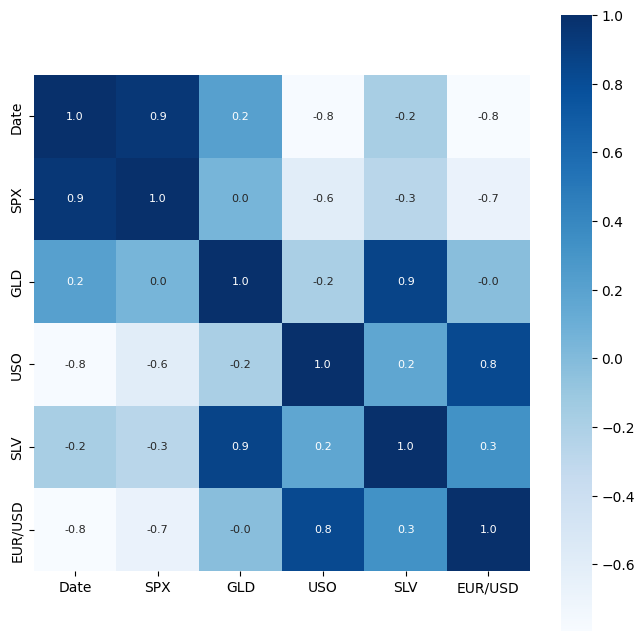

In [ ]:
# constructing a heatmap to understand the correlatiom
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='Blues')

In [ ]:
#correlation values of gold
print(correlation['GLD'])

Date       0.209118
SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


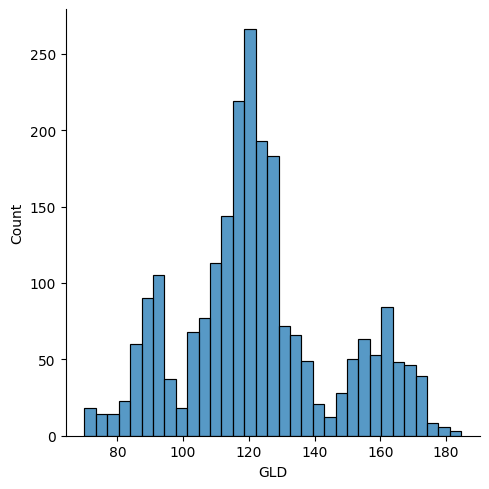

In [ ]:
#checking distribution of gold values
sns.displot(gold_data['GLD'])

Data Splitting

In [ ]:
#splitting
X = gold_data.drop(['Date','GLD'],axis=1)
Y = gold_data['GLD']

In [ ]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [ ]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


Splitting into training and testing data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state =2)

Model training

In [ ]:
regressor = RandomForestRegressor(n_estimators=100)

In [ ]:
regressor = RandomForestRegressor(n_estimators=100)

In [ ]:
# training the model
regressor.fit(X_train,Y_train)

RandomForestRegressor()

In [ ]:
# prediction on Test Data
test_data_prediction = regressor.predict(X_test)

In [ ]:
print(test_data_prediction)

[168.69569963  82.03529994 116.06490045 127.71250094 120.43880131
 154.878797   150.4394984  126.27140032 117.48019877 126.23839999
 116.32030097 171.28210083 141.65689806 167.88519774 115.24559956
 117.95490006 140.40270278 170.26140109 159.26370262 157.96140003
 155.13800011 125.36160024 174.98730024 157.05400436 125.14800054
  93.98500009  77.13760044 120.6159001  119.10499938 167.45590024
  88.28490028 125.31440017  91.34640069 117.53490003 121.14269956
 135.58280022 115.84870065 115.06270072 149.08940041 107.13340097
 104.46530255  87.23389797 126.52850045 117.74729979 152.4003992
 119.54739997 108.43009988 107.9770984   93.16910085 127.16999763
  75.49820041 113.60429937 121.28250041 111.22529888 118.90899904
 120.99779935 160.05069971 169.14320067 146.85709668  85.97999865
  94.1667004   86.87139858  90.61900023 118.99920045 126.40320058
 127.58529988 170.05009987 122.25649924 117.44129871  98.66440034
 168.66490176 142.93759833 131.98850262 121.09420203 120.75999933
 119.793700

Model Evaluation

In [ ]:
# prediction on Test Data
test_data_prediction = regressor.predict(X_test)

In [ ]:
print(test_data_prediction)

[168.69569963  82.03529994 116.06490045 127.71250094 120.43880131
 154.878797   150.4394984  126.27140032 117.48019877 126.23839999
 116.32030097 171.28210083 141.65689806 167.88519774 115.24559956
 117.95490006 140.40270278 170.26140109 159.26370262 157.96140003
 155.13800011 125.36160024 174.98730024 157.05400436 125.14800054
  93.98500009  77.13760044 120.6159001  119.10499938 167.45590024
  88.28490028 125.31440017  91.34640069 117.53490003 121.14269956
 135.58280022 115.84870065 115.06270072 149.08940041 107.13340097
 104.46530255  87.23389797 126.52850045 117.74729979 152.4003992
 119.54739997 108.43009988 107.9770984   93.16910085 127.16999763
  75.49820041 113.60429937 121.28250041 111.22529888 118.90899904
 120.99779935 160.05069971 169.14320067 146.85709668  85.97999865
  94.1667004   86.87139858  90.61900023 118.99920045 126.40320058
 127.58529988 170.05009987 122.25649924 117.44129871  98.66440034
 168.66490176 142.93759833 131.98850262 121.09420203 120.75999933
 119.793700

In [ ]:
# R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.9882685005799133


Compare the actual values and predicted values in a graph

In [ ]:
Y_test = list(Y_test)

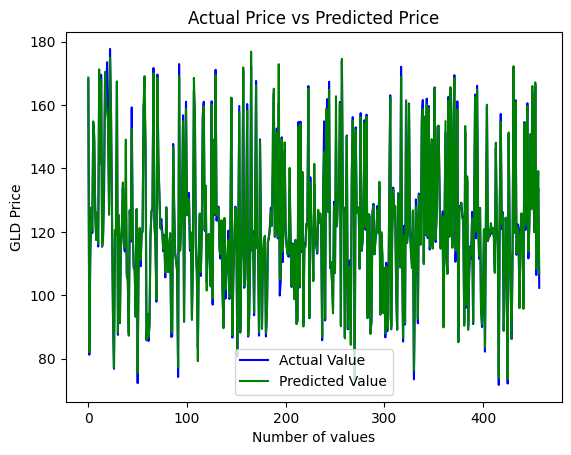

In [ ]:
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()